In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [6]:
# Import Requests Library and the weather_api_key.
import requests
# Import the API key
from config import weather_api_key

# Build basic URL + API key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eba3522468d0a8ca6a2240c33ed79c78"

# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try: 
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | beira
Processing Record 3 of Set 13 | constitucion
Processing Record 4 of Set 13 | turukhansk
Processing Record 5 of Set 13 | ushuaia
Processing Record 6 of Set 13 | santa rosa
Processing Record 7 of Set 13 | barrow
Processing Record 8 of Set 13 | lata
Processing Record 9 of Set 13 | vila franca do campo
Processing Record 10 of Set 13 | punta arenas
Processing Record 11 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 13 | rocha
Processing Record 13 of Set 13 | flin flon
Processing Record 14 of Set 13 | tuktoyaktuk
Processing Record 15 of Set 13 | kaitangata
Processing Record 16 of Set 13 | severo-kurilsk
Processing Record 17 of Set 13 | trinidad
Processing Record 18 of Set 13 | diapaga
Processing Record 19 of Set 13 | zverinogolovskoye
Processing Record 20 of Set 13 | vaitupu
City not found. Ski

Processing Record 36 of Set 16 | chongwe
Processing Record 37 of Set 16 | bethel
Processing Record 38 of Set 16 | suntar
Processing Record 39 of Set 16 | tamandare
Processing Record 40 of Set 16 | comodoro rivadavia
Processing Record 41 of Set 16 | klaksvik
Processing Record 42 of Set 16 | quesnel
Processing Record 43 of Set 16 | norrtalje
Processing Record 44 of Set 16 | tiarei
Processing Record 45 of Set 16 | marsh harbour
Processing Record 46 of Set 16 | maragogi
Processing Record 47 of Set 16 | thompson
Processing Record 48 of Set 16 | san cristobal
Processing Record 49 of Set 16 | gat
Processing Record 50 of Set 16 | poum
Processing Record 1 of Set 17 | grindavik
Processing Record 2 of Set 17 | amga
Processing Record 3 of Set 17 | hirna
Processing Record 4 of Set 17 | ribeira grande
Processing Record 5 of Set 17 | dikson
Processing Record 6 of Set 17 | wad rawah
Processing Record 7 of Set 17 | molde
Processing Record 8 of Set 17 | nyeri
Processing Record 9 of Set 17 | powell river

Processing Record 25 of Set 20 | narsaq
Processing Record 26 of Set 20 | valday
Processing Record 27 of Set 20 | toyooka
Processing Record 28 of Set 20 | bosaso
Processing Record 29 of Set 20 | goundam
Processing Record 30 of Set 20 | ambulu
Processing Record 31 of Set 20 | ortakoy
Processing Record 32 of Set 20 | beni mazar
Processing Record 33 of Set 20 | coquimbo
Processing Record 34 of Set 20 | praya
Processing Record 35 of Set 20 | seddon
Processing Record 36 of Set 20 | manzanillo
Processing Record 37 of Set 20 | fjerritslev
Processing Record 38 of Set 20 | khudumelapye
Processing Record 39 of Set 20 | saint-pierre
Processing Record 40 of Set 20 | korla
Processing Record 41 of Set 20 | villanueva de la serena
Processing Record 42 of Set 20 | muli
Processing Record 43 of Set 20 | tura
Processing Record 44 of Set 20 | margate
Processing Record 45 of Set 20 | aporawan
City not found. Skipping...
Processing Record 46 of Set 20 | mayo
Processing Record 47 of Set 20 | tambilil
Processi

Processing Record 16 of Set 24 | barcelos
Processing Record 17 of Set 24 | batticaloa
Processing Record 18 of Set 24 | belaya gora
Processing Record 19 of Set 24 | livingstone
Processing Record 20 of Set 24 | shieli
Processing Record 21 of Set 24 | tres lagoas
Processing Record 22 of Set 24 | villa union
Processing Record 23 of Set 24 | luang prabang
Processing Record 24 of Set 24 | yar-sale
Processing Record 25 of Set 24 | puerto cabezas
Processing Record 26 of Set 24 | kloulklubed
Processing Record 27 of Set 24 | general roca
Processing Record 28 of Set 24 | newport
Processing Record 29 of Set 24 | saint-augustin
Processing Record 30 of Set 24 | tokur
Processing Record 31 of Set 24 | kununurra
Processing Record 32 of Set 24 | katobu
Processing Record 33 of Set 24 | mehriz
Processing Record 34 of Set 24 | nanding
Processing Record 35 of Set 24 | alcudia
Processing Record 36 of Set 24 | katherine
Processing Record 37 of Set 24 | verkhnevilyuysk
Processing Record 38 of Set 24 | muzhi
Pr

In [12]:
len(city_data)

600

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beira,-19.84,34.84,82.40,58,20,9.17,MZ,2020-08-26 11:18:18
1,Constitucion,-35.33,-72.42,50.54,86,95,15.84,CL,2020-08-26 11:20:25
2,Turukhansk,65.82,87.98,69.40,53,82,10.51,RU,2020-08-26 11:20:25
3,Ushuaia,-54.80,-68.30,39.20,51,75,5.82,AR,2020-08-26 11:20:25
4,Santa Rosa,14.31,121.11,88.00,74,99,14.99,PH,2020-08-26 11:20:25
5,Barrow,71.29,-156.79,39.20,93,90,12.75,US,2020-08-26 11:20:25
6,Lata,40.16,-8.33,84.99,53,1,5.66,PT,2020-08-26 11:20:25
7,Vila Franca Do Campo,37.72,-25.43,77.00,78,20,14.99,PT,2020-08-26 11:20:26
8,Punta Arenas,-53.15,-70.92,30.20,68,93,12.75,CL,2020-08-26 11:20:26
9,Rocha,-34.48,-54.33,58.57,93,100,5.66,UY,2020-08-26 11:20:26


In [15]:
# Reoder Column
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beira,MZ,2020-08-26 11:18:18,-19.84,34.84,82.40,58,20,9.17
1,Constitucion,CL,2020-08-26 11:20:25,-35.33,-72.42,50.54,86,95,15.84
2,Turukhansk,RU,2020-08-26 11:20:25,65.82,87.98,69.40,53,82,10.51
3,Ushuaia,AR,2020-08-26 11:20:25,-54.80,-68.30,39.20,51,75,5.82
4,Santa Rosa,PH,2020-08-26 11:20:25,14.31,121.11,88.00,74,99,14.99
5,Barrow,US,2020-08-26 11:20:25,71.29,-156.79,39.20,93,90,12.75
6,Lata,PT,2020-08-26 11:20:25,40.16,-8.33,84.99,53,1,5.66
7,Vila Franca Do Campo,PT,2020-08-26 11:20:26,37.72,-25.43,77.00,78,20,14.99
8,Punta Arenas,CL,2020-08-26 11:20:26,-53.15,-70.92,30.20,68,93,12.75
9,Rocha,UY,2020-08-26 11:20:26,-34.48,-54.33,58.57,93,100,5.66


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598441131.606359

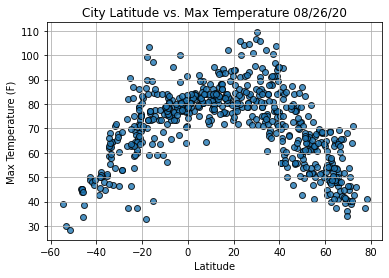

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

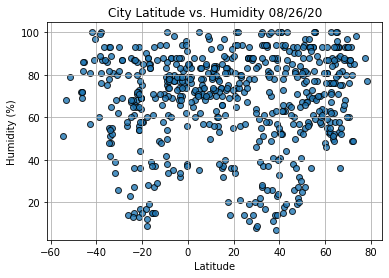

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

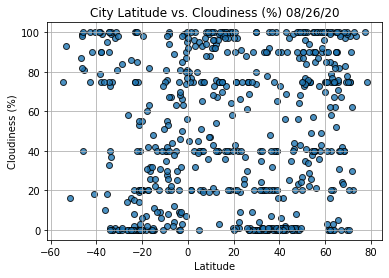

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

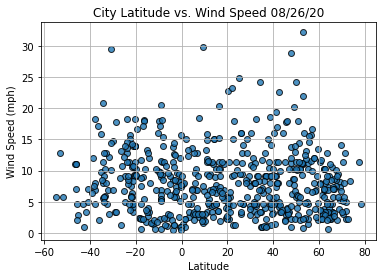

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City               Severo-Kurilsk
Country                        RU
Date          2020-08-26 11:20:26
Lat                         50.68
Lng                        156.12
Max Temp                     55.6
Humidity                       94
Cloudiness                    100
Wind Speed                   2.93
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beira,MZ,2020-08-26 11:18:18,-19.84,34.84,82.40,58,20,9.17
1,Constitucion,CL,2020-08-26 11:20:25,-35.33,-72.42,50.54,86,95,15.84
2,Turukhansk,RU,2020-08-26 11:20:25,65.82,87.98,69.40,53,82,10.51
3,Ushuaia,AR,2020-08-26 11:20:25,-54.80,-68.30,39.20,51,75,5.82
4,Santa Rosa,PH,2020-08-26 11:20:25,14.31,121.11,88.00,74,99,14.99


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

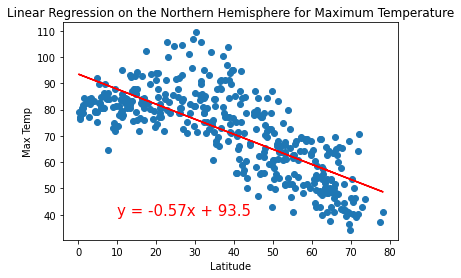

In [28]:
# Linear regression on the Northern Hemisphere
from scipy.stats import linregress
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

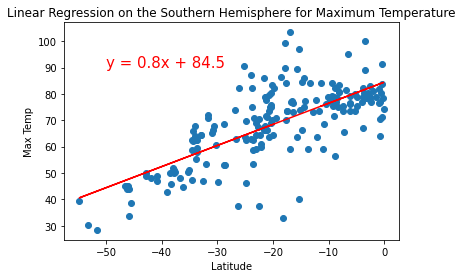

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

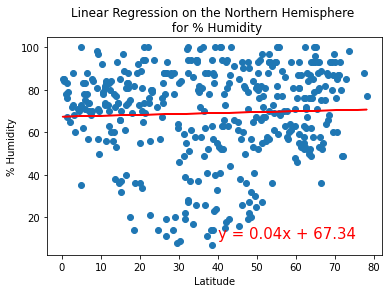

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

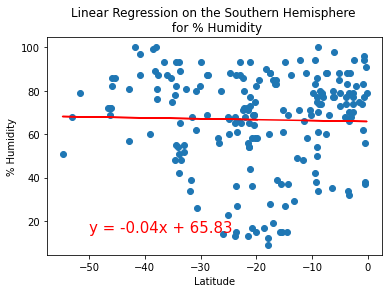

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

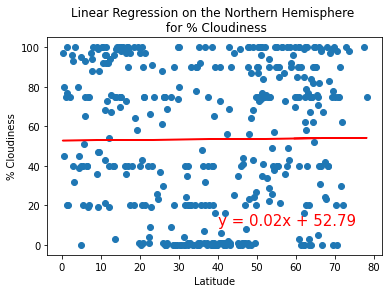

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

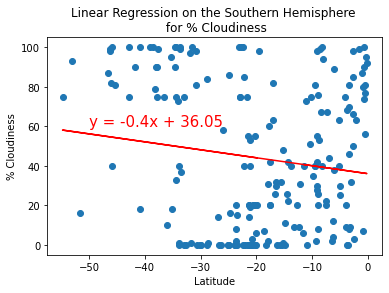

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

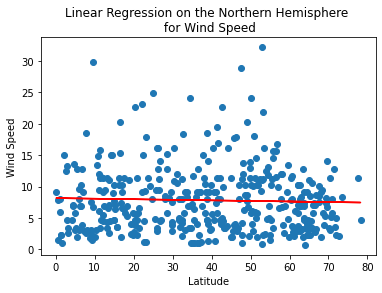

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", 'Wind Speed',(40,35))

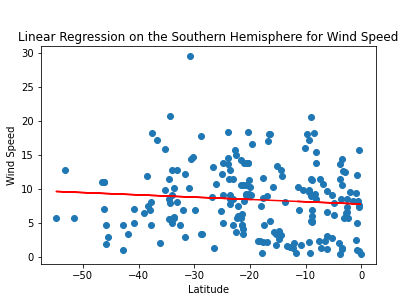

In [36]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))